<center>
    <h1> Wykrywanie naczń krwonośnych</h1>
    <h3>Informatyka w Medycynie - projekt 2</h3>
    <h3>Michał Płocki, Tomasz Pućka</h3>
</center>

In [1]:
import statistics
import sys

import skimage
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage.measure
import cv2
from scipy._lib.six import xrange
from random import randint
from sklearn import ensemble
from sklearn.svm import SVC
from BloodVesselDetector import build, test, train,prediction

Tworzymy tablice obrazów
- Images: są to obrazy poddane konwersji kolorów na odcienie szarości i wyrównanej jasności za pomocą filtru CLAHE. końcowo są progowane w celu uzyskania binarnego czarno białego obrazu

- proceed_images: są to obrazy poddane konwersji kolorów na odcienie szarości i wyrównanej jasności za pomocą filtru CLAHE. Następnie stosujemy erozje, morfolofie zamykającą i otwierającą w celu redukcji szumów. Na koniec stosujemy filtr Canny w celu wykrycia krawędzi

- proceed_detecteds: są to ręcznie narysowane wykryte naczynia krwionośne

Każda tablica jest podzielona na przedziały
- index 0: obraz używany do predykcji
- indexy (1,15): zbiór uczący
- indexy (15,20): zbiór testowy

Text(0.5, 1.0, 'Przykładowy obraz ze zbioru proceed_detecteds')

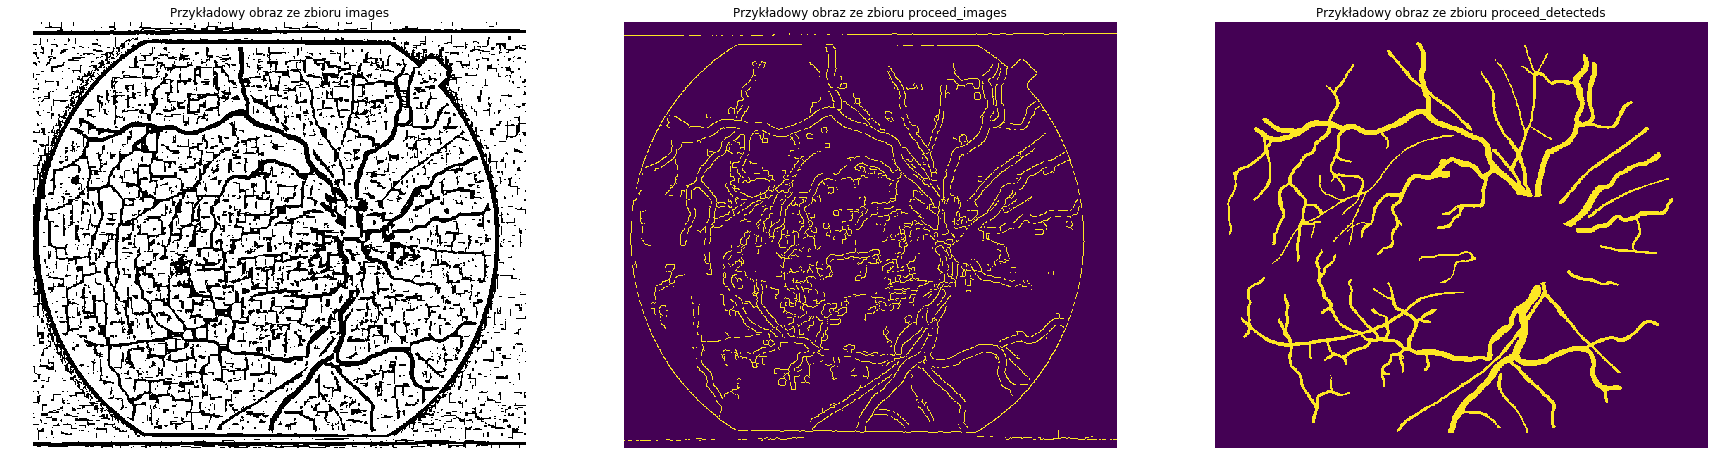

In [2]:
images, proceed_images, proceed_detecteds = build()
fig, axes = plt.subplots(1, 3,figsize=(30,60))
axes[0].imshow(images[5], cmap='gray')
axes[0].axis('off')
axes[0].set_title('Przykładowy obraz ze zbioru images')
axes[1].imshow(proceed_images[5])
axes[1].axis('off')
axes[1].set_title('Przykładowy obraz ze zbioru proceed_images')
axes[2].imshow(proceed_detecteds[5])
axes[2].axis('off')
axes[2].set_title('Przykładowy obraz ze zbioru proceed_detecteds')

Tworzymy klasyfiator RandomForest o liczbie estymatorów=30

In [5]:
clf = ensemble.RandomForestClassifier(n_estimators=50)

Na podstawie wcześniej stworzonych zbiorów obrazów tworzymy zbiory treningowe

- X_train: Losujemy punkty x,y w przetwarzanym obrazie tak długo aż osiągniemy 100 putnków, które w ręcznie wykrytych naczyniach są oznaczone jako złe(nie są naczyniem) i 200 takich które są dobre(są naczyniem). Nastęnie dla każdego punktu wybieramy wycinki odpowiadającego obrazu ze zbiorów images i proceed_images o rozmiarze 9x9. na podstawie tych 2 wycinków budujemy pojedynczy wektor uczący. Wektor składa sie z:
    - wariacji kolorow obrazu images
    
    - wariacji kolorów obrazu proceed_images
    
    - momentów centralinych obrazu proceed_images
    
    - momentów hu obrazu proceed_images
- Y_train: jest to wykrycie naczynia lub jego braku w obrazie ze zbioru proceed_detecteds w wylosowanym wyżej pixelu(warość 1 lub 0) 

In [6]:
X_train, Y_train = train(images, proceed_images, proceed_detecteds)

zakończono naukę


Na podstawie wcześniej stworzonych zbiorów czymy nasz model

In [7]:
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Dla obrazów z przedziału testowego losujemy punkty(na każdy obraz 100 "dobrych", 100 "złych") wybieramy dla nich wycinki 9x9(po jednym z images i proceed_images). Za pomocą funkcji predict przewidujemy do jakiej klasy powinen należeć pixel. nastepnie porównujemy decyzje z wartością pixela w ręcznie wykrywanym obranzie. Na podstawie tego porównania tworzymy macierz pomyłek i obliczamy resztę wartości

In [8]:
test(clf,images, proceed_images, proceed_detecteds)

TP = 408 | TN = 356
FP = 144 | FN = 92
accuracy = 0.764
sensitivity = 0.816
specificity = 0.712


Pobieramy obraz, w którym chcemy wykryć naczynia. Pixel po pixelu przechodzimy po obrazie tworząc dla każdego z nich wektor analogiczny do uczącego. Stosując funkcje klasyfikatora "Predict" podejmujemy decyzje do jakiej klasy powinien należeć pixel 

5.0%
10.0%
15.0%
20.0%
25.0%
30.0%
35.0%
40.0%
45.0%
50.0%
55.0%
60.0%
65.0%
70.0%
75.0%
80.0%
85.0%
90.0%
95.0%
100.0%
przetwarzanie na 4
TP = 5958 | TN = 365555
FP = 11054 | FN = 27983
accuracy = 0.9049153574473268
sensitivity = 0.17553990748652074
specificity = 0.970648603724287
przetwarzanie na 3
TP = 32062 | TN = 219558
FP = 157051 | FN = 1879
accuracy = 0.6128851540616247
sensitivity = 0.9446392268937274
specificity = 0.5829865988332728


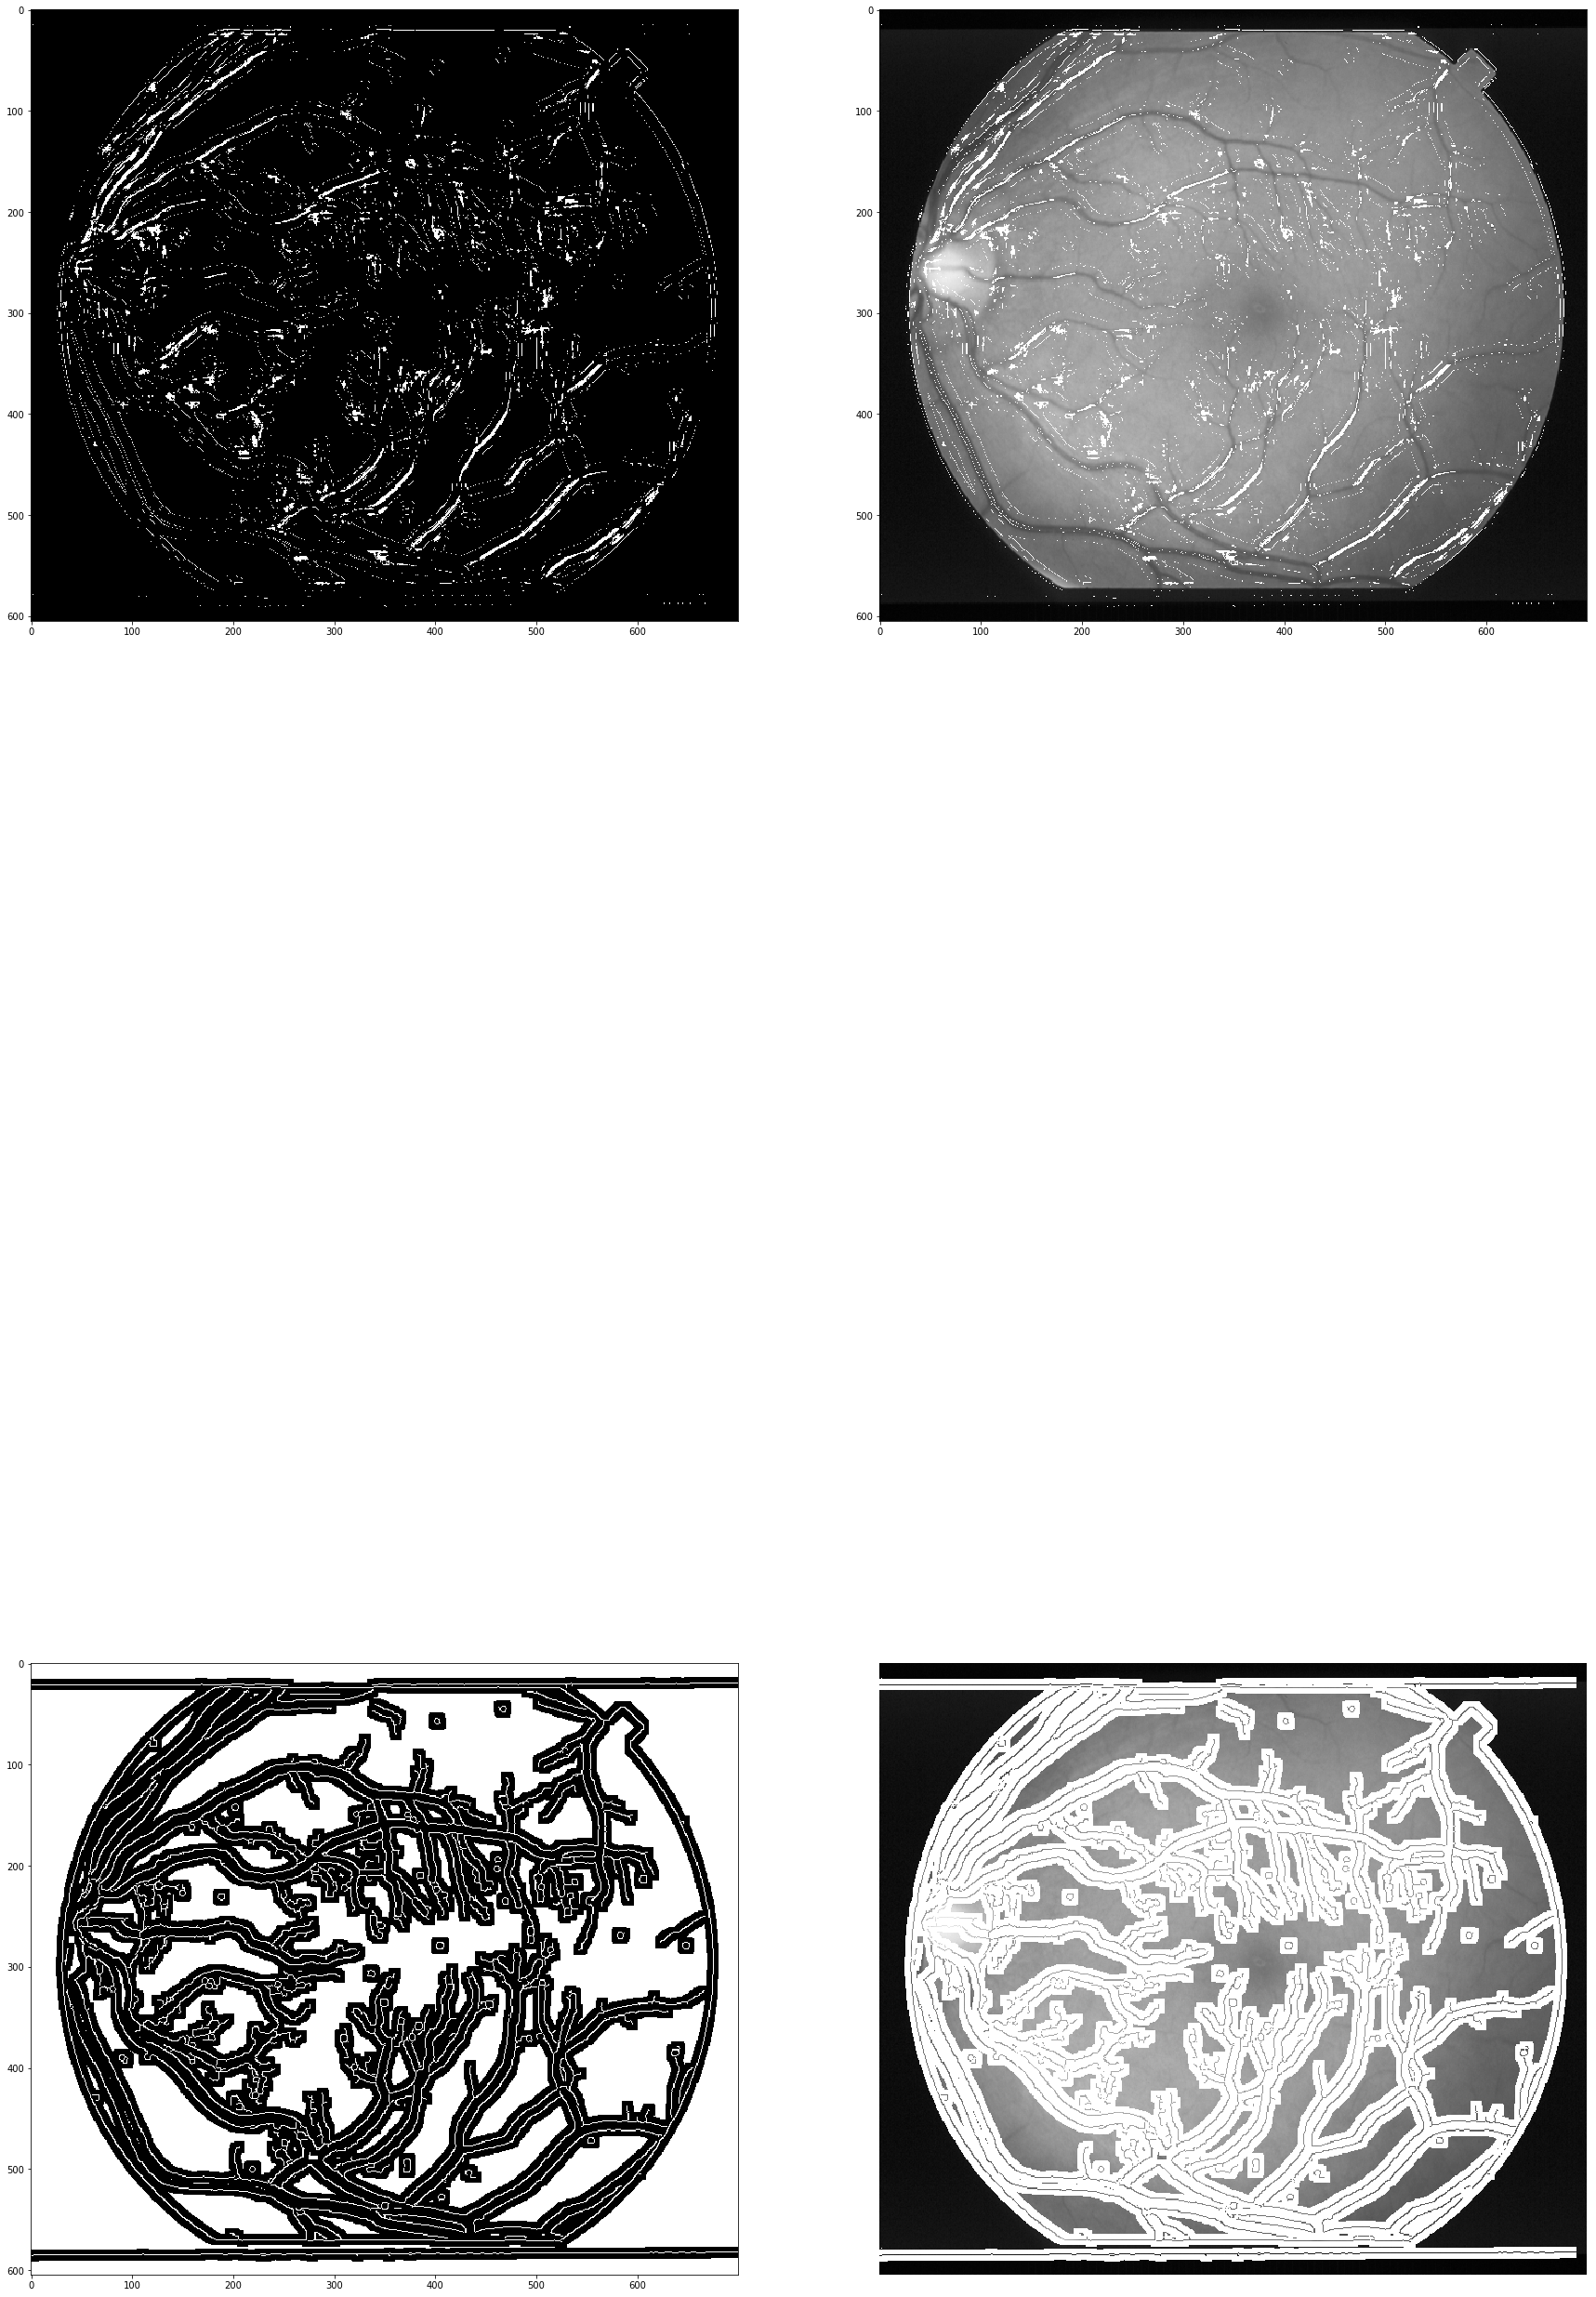

In [9]:
end_image = cv2.imread("scan/end.ppm", cv2.IMREAD_GRAYSCALE)
end_detected = cv2.imread("hand/end.ppm", cv2.IMREAD_GRAYSCALE)
prediction(clf,end_image,end_detected)